# Plotter
plotter.py   
- composition class (draws both circle and rectangle)

- Since circle.py and rectangle.py already inherit from Geometry, no need 
to repeat x, y. Just the unique attributes per shape.

- Draws both shapes on the same axes using matplotlib.patches

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from plotter import Shape2DPlotter

from circle import Circle
from rectangle import Rectangle

In [ ]:
# plotter.py
# Simple plotter for 2D shapes (Circle and Rectangle)

import matplotlib.pyplot as plt
import matplotlib.patches as patches


class Shape2DPlotter:
    """Can draw several 2D shapes on one plot."""
    def __init__(self):
        self.shapes = []  # holds Circle and Rectangle objects

    def add_shape(self, shape):
        """Add a shape (Circle or Rectangle)."""
        self.shapes.append(shape)

    def plot_all(self):
        """Draw all shapes using patches."""
        fig, ax = plt.subplots()

        for i, shape in enumerate (self.shapes, start = 1):
            # Check if it's a Circle or Rectangle
            if shape.__class__.__name__ == "Circle":
                patch = patches.Circle((shape.x, shape.y), shape.radius, color='lightblue', fill = False, linewidth = 3)
                label = f"Circle {i}"

            elif shape.__class__.__name__ == "Rectangle":
                patch = patches.Rectangle((shape.x, shape.y), shape.width, shape.height, color='lightgreen', fill = False, lindewidth = 3)
                label = f"Rectangle {i}"

            else:
                print("Unknown shape, skipping...")
                continue

            ax.add_patch(patch)
            print(f"Drew {shape.__class__.__name__} at ({shape.x}, {shape.y})")

        ax.set_xlim(-2, 10)
        ax.set_ylim(-2, 8)
        ax.set_aspect('equal')
        ax.set_title("2D Circle and Rectangle Plot")
        plt.show()


Drew Circle at (2, 2)
Drew Circle at (3, 3)


AttributeError: Rectangle.set() got an unexpected keyword argument 'lindewidth'

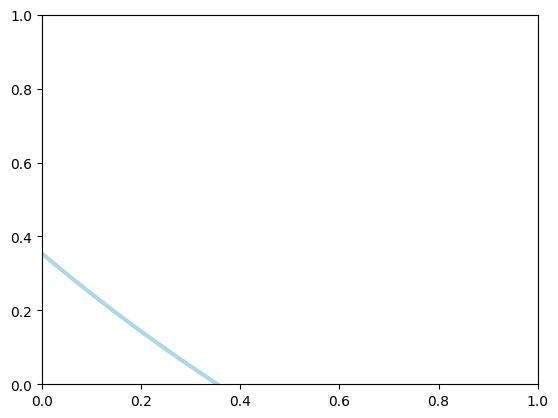

In [12]:
# main.py (or test_plotter.ipynb)
from circle import Circle
from rectangle import Rectangle


# (x, y, radius)
c1 = Circle(2, 2, 1)
c2 = Circle(3, 3, 4)

# (x, y, width, height)
r1 = Rectangle(5, 1, 3, 2)

plotter = Shape2DPlotter()
plotter.add_shape(c1)
plotter.add_shape(c2)
plotter.add_shape(r1)
plotter.plot_all()
